In [155]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

### Ввод и описание данных
Набор данных содержит 14 атрибутов, описывающих состояние пациента. Задача состоит в предсказании на основе имеющихся данных наличия сердечного заболевания.

In [156]:
# Подключаем google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
path = '/content/drive/MyDrive/data/heart.csv' # путь к данным на диске
data = pd.read_csv(path)

In [158]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [159]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Описание переменных
* age - возраст пациента
* sex - пол: 1 - мужчина; 0 - женщина
* cp - тип боли в груди: 0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная
* trestbps - артериальное давление в состоянии покоя (при поступлении в больницу), мм рт. ст.
* chol - сывороточный холестерин в мг/дл
* fbs -  уровень сахара в крови натощак > 120 мг / дл (1 - правда; 0 - ложь)
* restecg - повторная ЭКГ: 0 - в норме, 1 - наличие аномалии зубца ST-T (инверсии зубца T и / или подъем или депрессия ST > 0,05 мВ), 2 - наличие вероятной или определенной гипертрофии левого желудочка
* thalach - максимальная частота сердечных сокращений
* exang - стенокардия, вызванная физической нагрузкой (1 - да; 0 - нет)
* oldpeak - депрессия сегмента ST, вызванная физической нагрузкой по сравнению с отдыхом
* slope - наклон сегмента ST при пиковой нагрузке: 0 - подъем, 1 - пологий, 2 - спуск
* ca - количество крупных сосудов, выделенных методом flourosopy (0 - 1)
* thal - 3 - нормально; 6 - исправленный дефект; 7 - обратимый дефект
* target - наличие/отсутствие сердечного заболевания (1 - да; 0 - нет)



In [160]:
# размер данных
data.shape

(303, 14)

In [161]:
# типы данных
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Все признаки являются числовыми, т.к. категориальные переменные уже были закодированы при составлении набора данных.

In [162]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропущенные значения отсутствуют.

In [163]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

Классы можно считать сбалансированными.

In [164]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Можно видеть разный масштаю признаков, вероятно, потребуется их нормализация.

### Scatterplots with targets

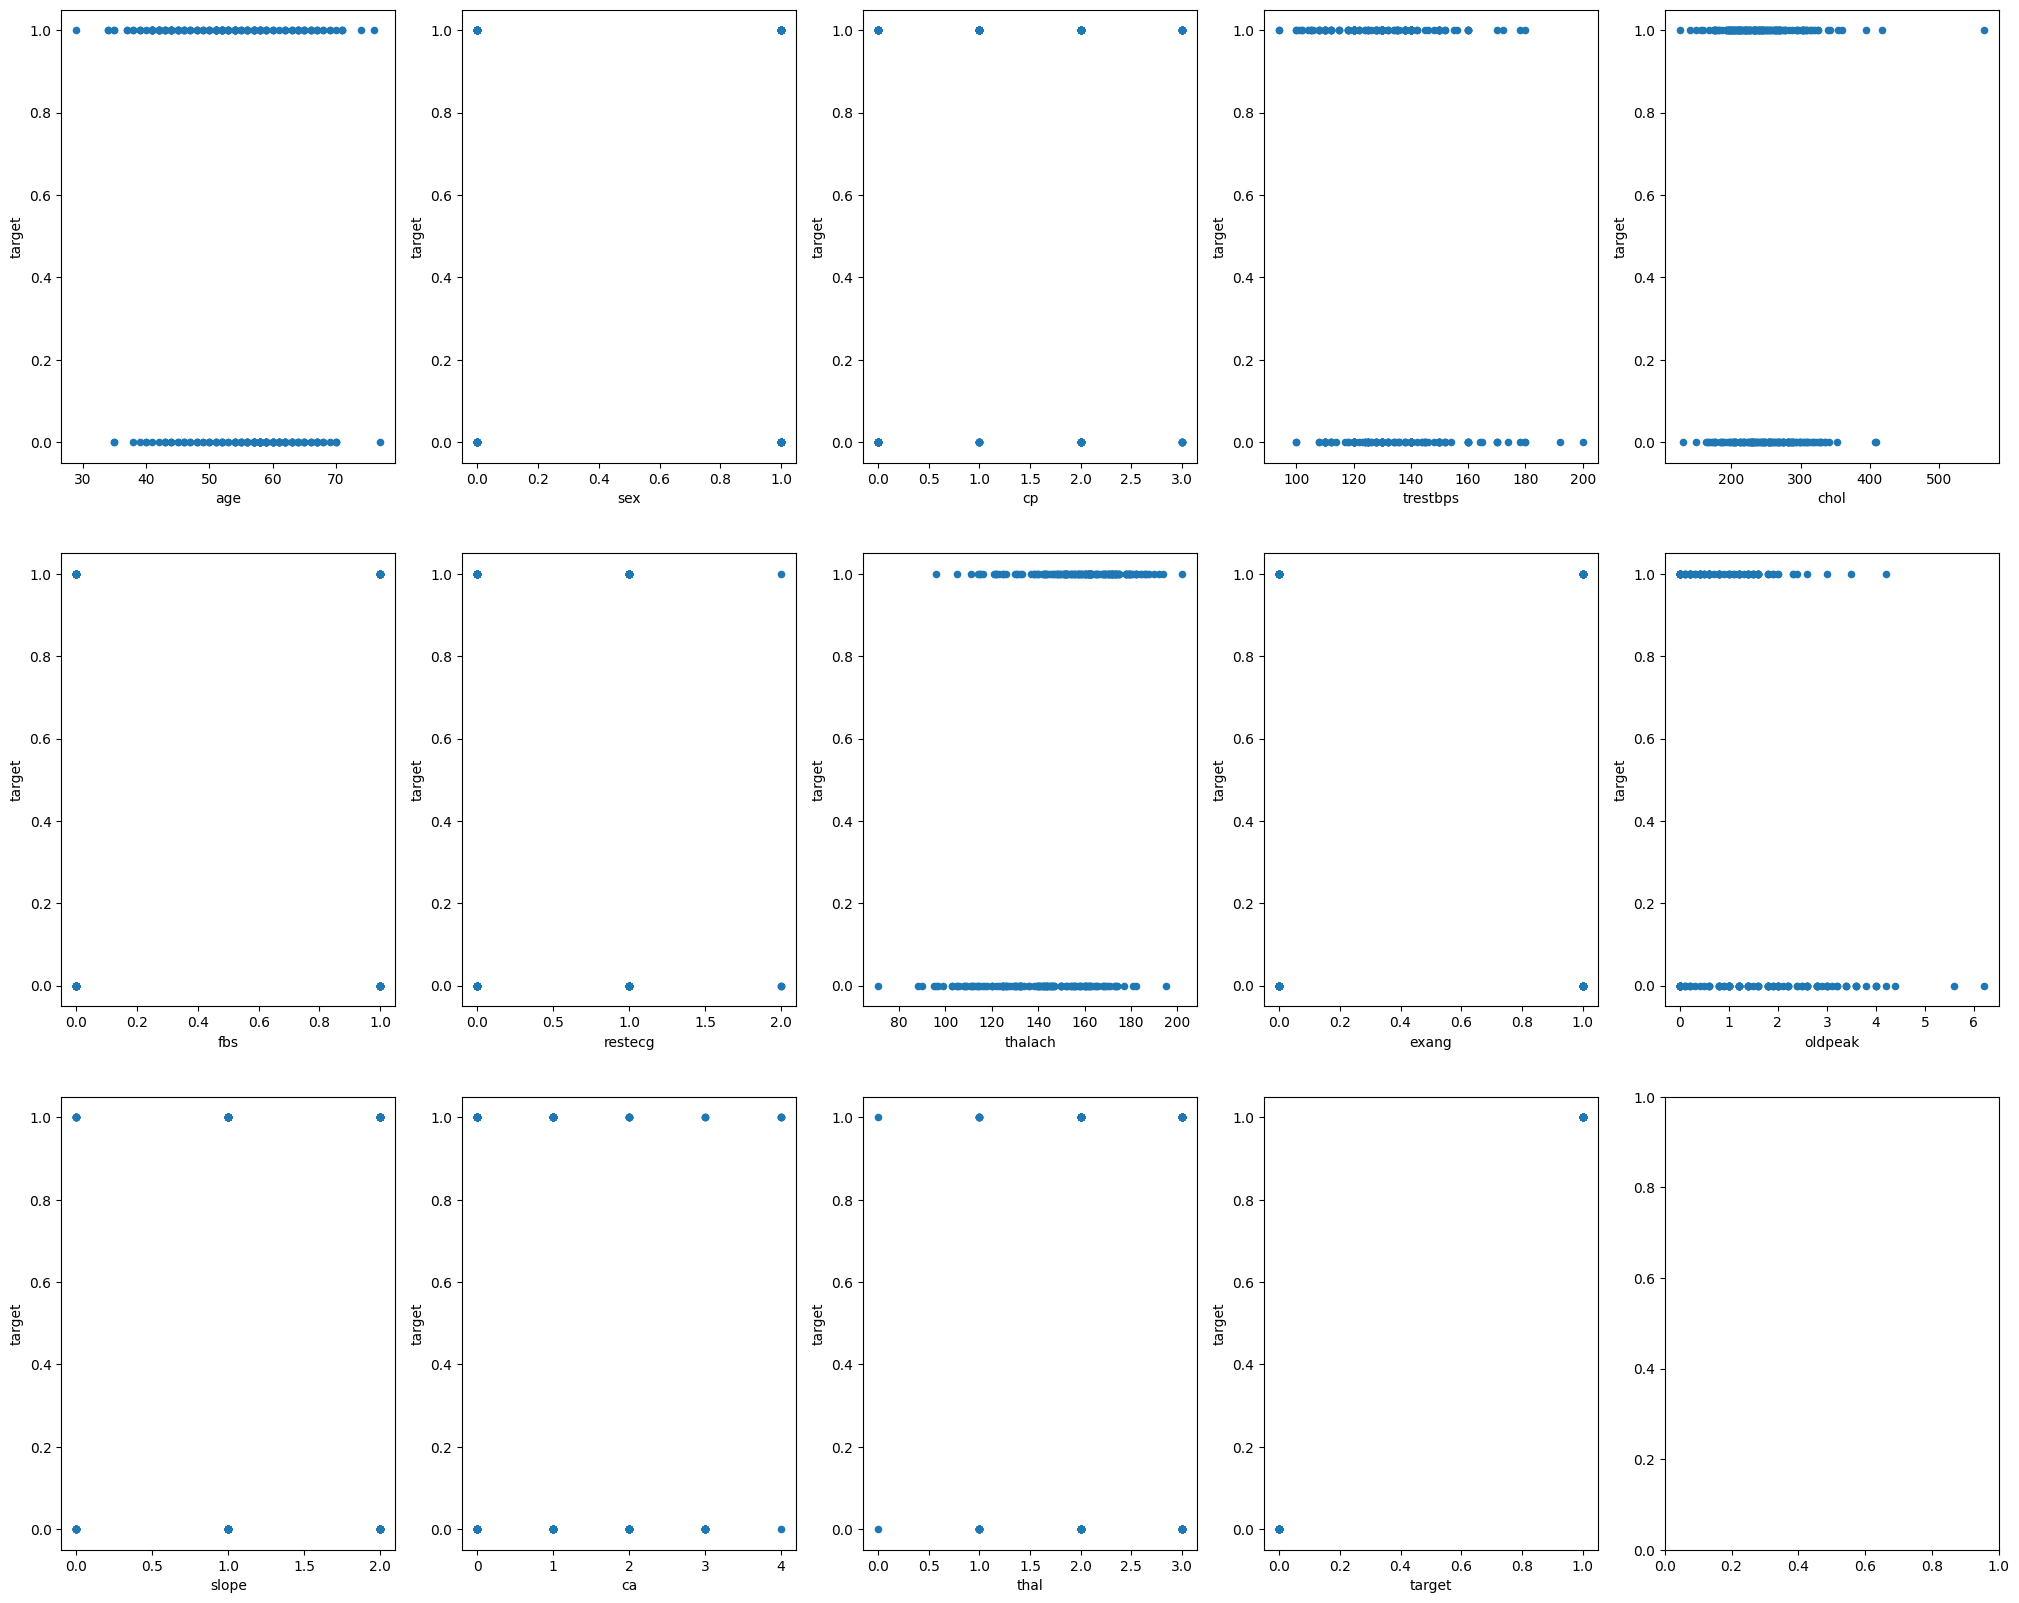

In [165]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "target", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

### Гистограммы распределения признаков

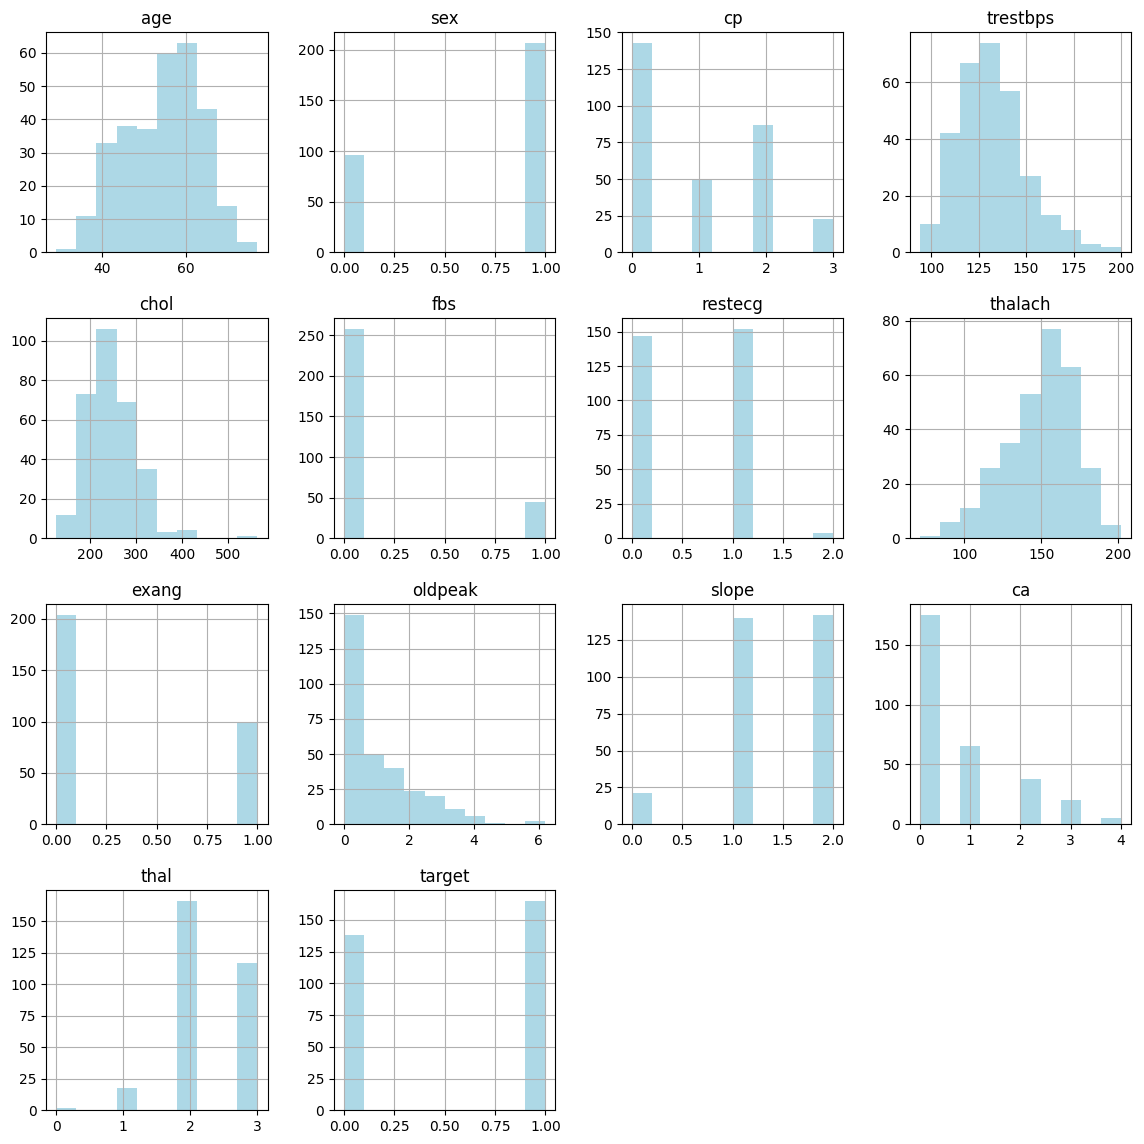

In [166]:
data.hist(figsize=(14,14) , color = 'lightblue')
plt.show()

### Выбросы

In [167]:
numeric_columns=['age','trestbps','chol','thalach','oldpeak']

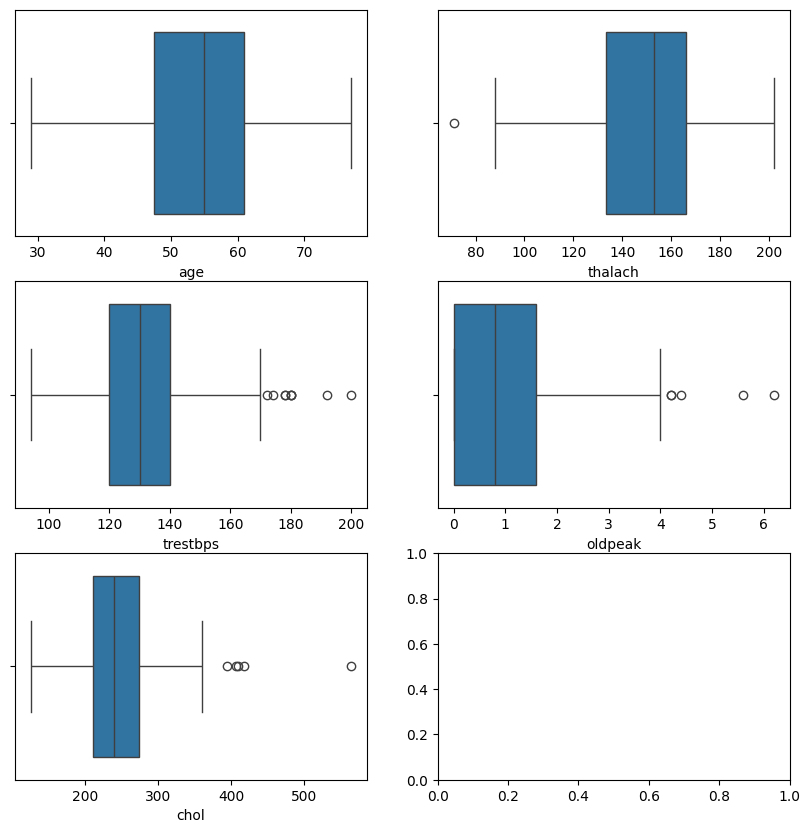

In [168]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
count = 0
for idx, feature in enumerate(numeric_columns):
    sns.boxplot(x=data[feature], ax=axes[count % 3, count // 3])
    count += 1

In [169]:
for col in numeric_columns:
    print(f'Outliers for {col} column: {boxplot_stats(data[col]).pop(0)["fliers"]}\n')

Outliers for age column: []

Outliers for trestbps column: [172 178 180 180 200 174 192 178 180]

Outliers for chol column: [417 564 394 407 409]

Outliers for thalach column: [71]

Outliers for oldpeak column: [4.2 6.2 5.6 4.2 4.4]



### Распределение числовых признаков

<Axes: xlabel='oldpeak', ylabel='Density'>

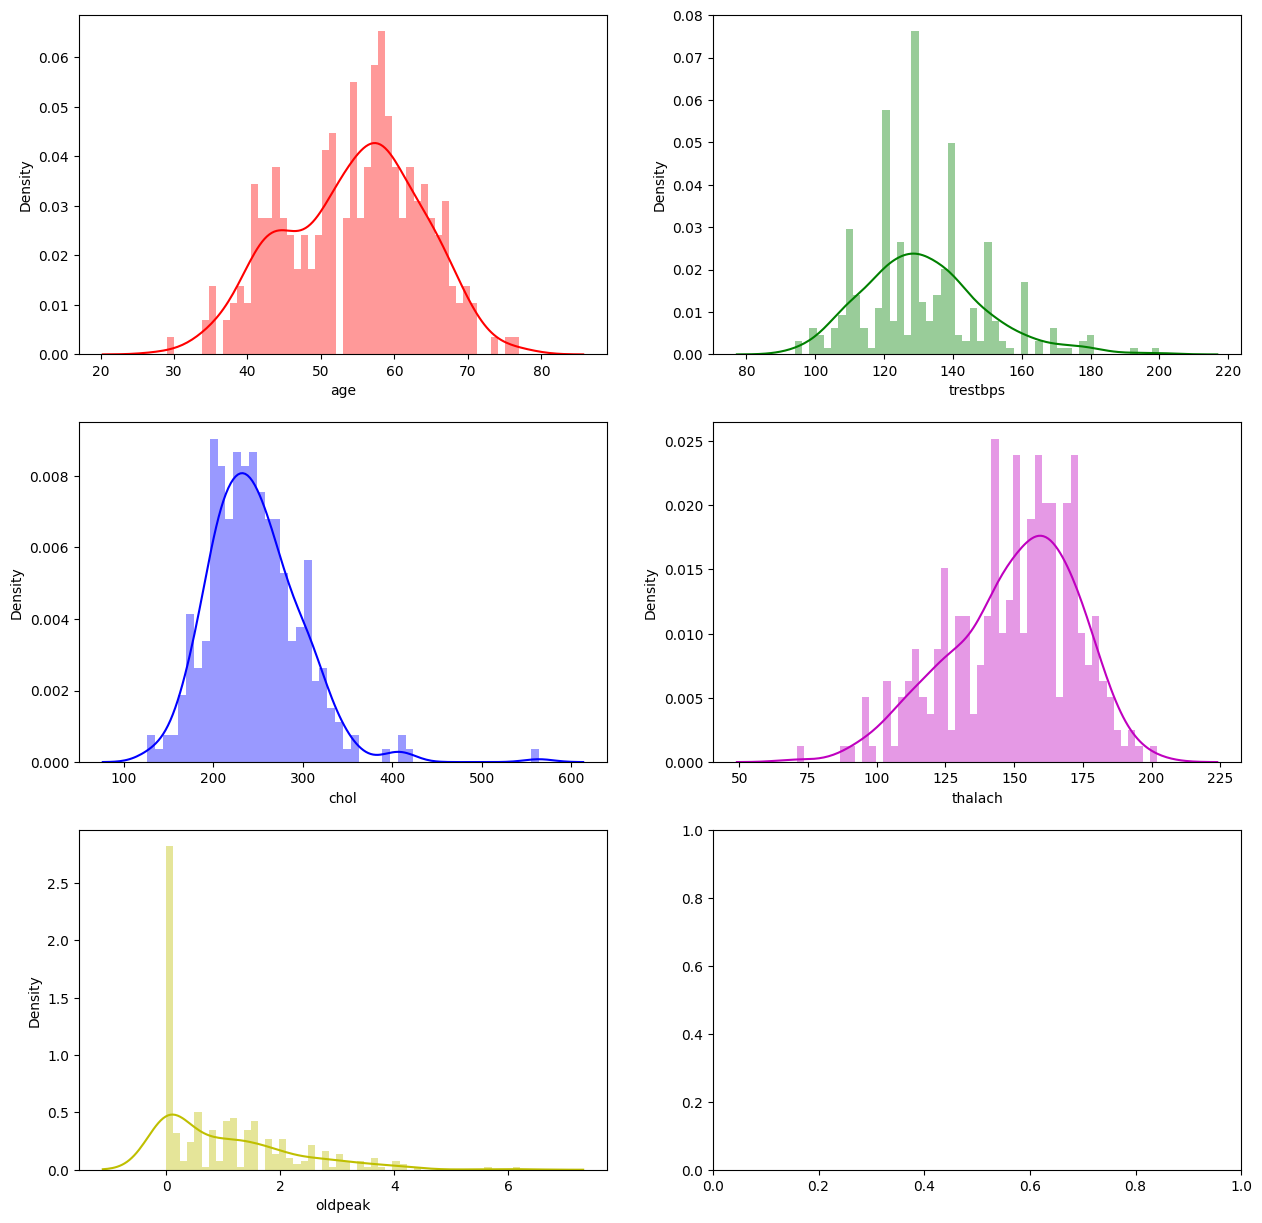

In [170]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(data['age'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(data['trestbps'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(data['chol'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(data['thalach'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(data['oldpeak'], bins=50, color='y', ax=axes[2, 0])

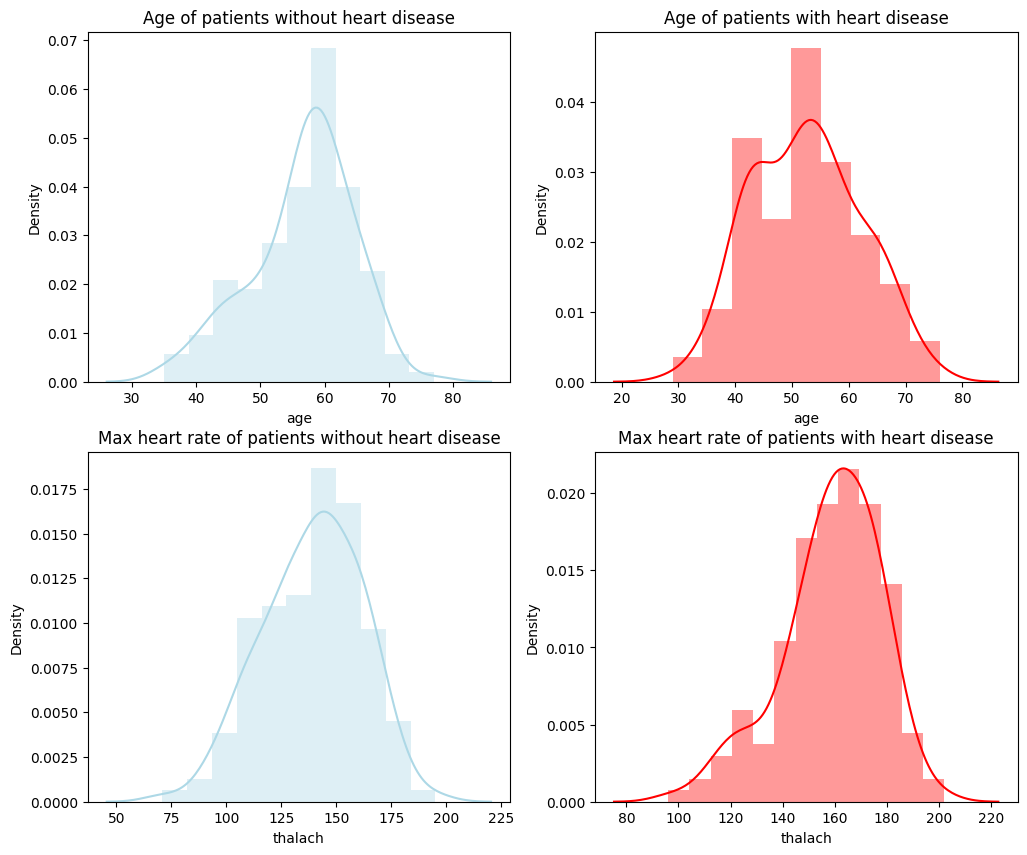

In [171]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age , color ='lightblue')
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(data[data['target']==1].age , color ='red')
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(data[data['target']==0].thalach, color ='lightblue' )
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(data[data['target']==1].thalach , color ='red')
plt.title('Max heart rate of patients with heart disease')
plt.show()

## Correlation matrix

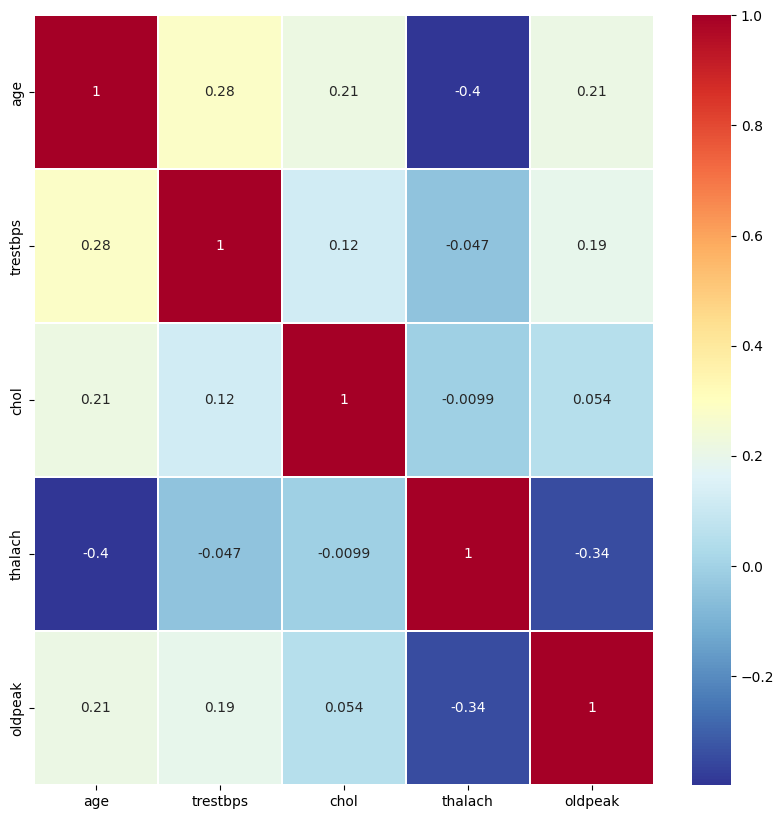

In [172]:
plt.figure(figsize=(10,10))
sns.heatmap(data[numeric_columns].corr(), cmap="RdYlBu_r", annot=True, linewidths=0.1);

Можно выделить довольно сильную обратную корреляцию между возрастом (age) и максимальной частотой сердечных сокращений (thalach), а также между максимальной частотой сердечных сокращений (thalach) и депрессией сегмента ST, вызванной физической нагрузкой (oldpeak).

Выделим целевую переменную.

In [173]:
X,y=data.loc[:,:'thal'],data.loc[:,'target']

In [174]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [175]:
X.shape

(303, 13)

In [176]:
y.shape

(303,)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

In [178]:
# sc=StandardScaler().fit(X)
# X_std=sc.transform(X)

scaler = StandardScaler()
X_std = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

In [179]:
X_std.head

<bound method NDFrame.head of           age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope  

In [180]:
X_std.shape

(303, 13)

Разделяем на обучающую и тестовую выборки

In [181]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std, y, random_state=10, test_size=0.3, shuffle=True)

In [182]:
X_train_std.shape

(212, 13)

In [183]:
X_test_std.shape

(91, 13)

In [184]:
y_train.value_counts()

1    124
0     88
Name: target, dtype: int64

DummyClassifier - baseline<br/>
В качестве baseline используем DummyClassifier, предсказывающий наиболее частотный класс.

In [185]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_std, y_train);

Для задачи бинарной классификации при сбалансированности классов в качестве метрики качества можно использовать accuracy. Однако в задачах медицинской диагностики, поскольку важнее определить именно наличие сердечного заболевания (класс 1), в качестве метрики предпочтительнее использовать метрику recall, показывающую долю истинных положительных ответов, которые были определены моделью из общего числа положительных ответов.

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [187]:
y_pred_dummy = dummy_clf.predict(X_test_std)
print(f'Accuracy for Dummy Classificator: {accuracy_score(y_test, y_pred_dummy)}')

Accuracy for Dummy Classificator: 0.45054945054945056


In [188]:
confusion_matrix(y_test, y_pred_dummy)

array([[ 0, 50],
       [ 0, 41]])

In [189]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')

Recall for Dummy Classificator: 1.0


In [190]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy)}')

Precision for Dummy Classificator: 0.45054945054945056


Поскольку положительный класс (класс 1) является более частотным, FN = 0, следовательно, recall в таком случае равен 1, однако значения accuracy и precision получились довольно низкие.

### Decision Tree
В качестве более сложной модели используем дерево решений и случайный лес.

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
dt=DecisionTreeClassifier(max_features = None, random_state=2023)

In [193]:
dt.fit(X_train_std,y_train)

DecisionTreeClassifier(random_state=2023)

In [194]:
prediction_dt=dt.predict(X_test_std)

In [195]:
prediction_dt

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0])

In [196]:
accuracy_dt=accuracy_score(y_test,prediction_dt)
print(f'Accuracy for Decision Tree Classificator: {accuracy_dt}')

Accuracy for Decision Tree Classificator: 0.7362637362637363


In [197]:
confusion_matrix(y_test, prediction_dt)

array([[31, 19],
       [ 5, 36]])

У модели довольно часто происходят ложноположительные предсказания

In [198]:
recall_dt=recall_score(y_test,prediction_dt)
print(f'Recall for Decision Tree Classificator: {recall_dt}')

Recall for Decision Tree Classificator: 0.8780487804878049


In [199]:
precision_dt=precision_score(y_test,prediction_dt)
print(f'Precision for Decision Tree Classificator: {precision_dt}')


Precision for Decision Tree Classificator: 0.6545454545454545


### Случайный лес

In [200]:
rf = RandomForestClassifier(random_state=2023)
rf.fit(X_train_std, y_train)
prediction_rf=rf.predict(X_test_std)

accuracy_rf=accuracy_score(y_test,prediction_rf)
print(f'Accuracy for Random Forest Classificator: {accuracy_rf}')

recall_rf=recall_score(y_test,prediction_rf)
print(f'Recall for Random Forest Classificator: {recall_rf}')

precision_rf=precision_score(y_test,prediction_rf)
print(f'Precision for Random Forest Classificator: {precision_rf}')


Accuracy for Random Forest Classificator: 0.7692307692307693
Recall for Random Forest Classificator: 0.8780487804878049
Precision for Random Forest Classificator: 0.6923076923076923


Случайный лес сработал немного лучше обычного дерева. Попробуем подобрать гиперпараметры. Добавим также к рассмотрению метод опорных векторов.

In [201]:
!pip install optuna > None

In [212]:
import optuna

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

In [203]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "DecisionTree", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=svc_c, gamma="auto")
    elif classifier_name == "DecisionTree":
        dt_max_depth = trial.suggest_int("dt_max_depth", 2, 30, log=True)
        classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth)
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 30, log=True)
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 2, 10, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators)

    classifier_obj.fit(X_train_std, y_train)
    score = cross_val_score(classifier_obj, X_train_std, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [204]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-02-22 23:46:37,653] A new study created in memory with name: no-name-a143cd5e-026e-4128-9e63-c2f45c2fd73f
[I 2024-02-22 23:46:39,235] Trial 0 finished with value: 0.7690140845070422 and parameters: {'classifier': 'SVC', 'svc_c': 330134049.7589059}. Best is trial 0 with value: 0.7690140845070422.
[I 2024-02-22 23:46:39,294] Trial 1 finished with value: 0.7690140845070422 and parameters: {'classifier': 'SVC', 'svc_c': 41995094.74205266}. Best is trial 0 with value: 0.7690140845070422.
[I 2024-02-22 23:46:39,347] Trial 2 finished with value: 0.745271629778672 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 4}. Best is trial 0 with value: 0.7690140845070422.
[I 2024-02-22 23:46:39,415] Trial 3 finished with value: 0.6930918846411803 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.7690140845070422.
[I 2024-02-22 23:46:39,452] Trial 4 finished with value: 0.5849094567404426 and parameters: {'classif

In [205]:
print(study.best_trial)

FrozenTrial(number=95, state=TrialState.COMPLETE, values=[0.8631790744466801], datetime_start=datetime.datetime(2024, 2, 22, 23, 46, 47, 654572), datetime_complete=datetime.datetime(2024, 2, 22, 23, 46, 47, 836826), params={'classifier': 'RandomForest', 'rf_max_depth': 5, 'rf_n_estimators': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'DecisionTree', 'RandomForest')), 'rf_max_depth': IntDistribution(high=30, log=True, low=2, step=1), 'rf_n_estimators': IntDistribution(high=10, log=True, low=2, step=1)}, trial_id=95, value=None)


In [206]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [207]:
from optuna.visualization import plot_slice

plot_slice(study)

In [208]:
print(study.best_params)
print(study.best_value)

{'classifier': 'RandomForest', 'rf_max_depth': 5, 'rf_n_estimators': 10}
0.8631790744466801


Лучшей моделью оказался Random Forest при max_depth = 2 и n_estimators = 10, прри этом на валидационной выборке accuracy = 0.84.<br/>
Проверим качество на тестовой выборке.

In [209]:
rf_optimized = RandomForestClassifier(max_depth = 2, n_estimators = 10, random_state=2023)
rf_optimized.fit(X_train_std, y_train)
y_pred_optimized = rf_optimized.predict(X_test_std)

print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        50
           1       0.71      0.90      0.80        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91



Из-за небольшого объема данных более сложные модели, такие как современные алгоритмы бустинга из библиотек XGBoost и CatBoost, не рассматривались.

### Интерпретация

#### Mean Decrease Impurity

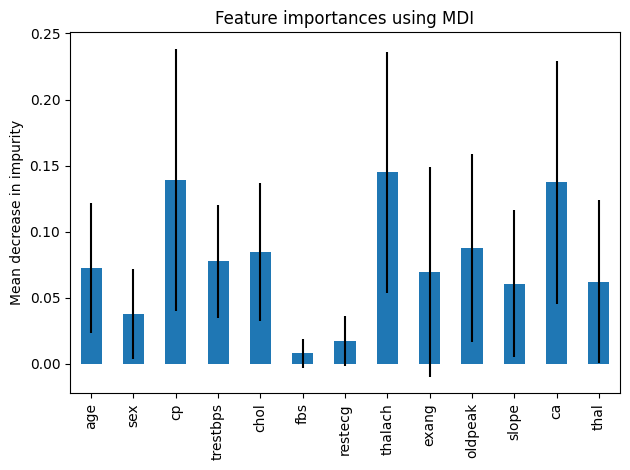

In [210]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train_std.columns)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity", )
fig.tight_layout()

Согласно методу Mean Decrease Impurity наибольшее значение влияние на разделение классов оказывает тип боли в груди, максимальная частота сердцебиения и количество крупных сосудов, окрашенных рентгеноскопией. Все эти параметры напрямую связаны с функционированием сердечно-сосудистой системы, поэтому такое влияние вполне обосновано. Наименьшее влияние оказывает уровень сахара натощак.



#### Permutation importances

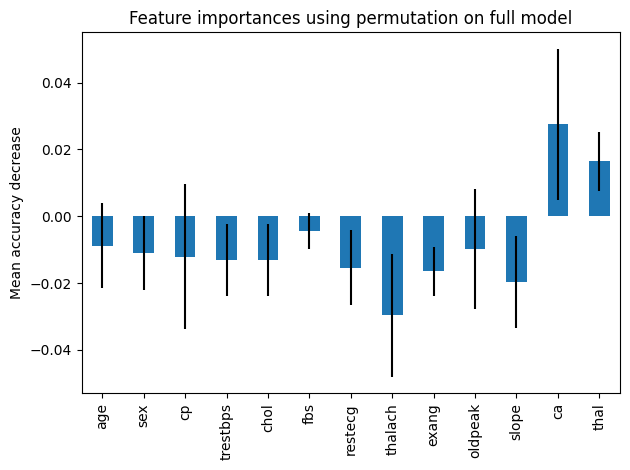

In [213]:
importances = permutation_importance(rf, X_test_std, y_test, n_repeats=10, random_state=2023, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train_std.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

По-прежнему наиболее информативными признаками являются максимальная частота сердцебиения и количество крупных сосудов, окрашенных рентгеноскопией, однако видно, что они оказывают противоположное влияние (увеличение частоты сердцебиения, действительно, может свидетельствовать о наличие заболевания (класс 1)). Уровень сахара по-прежнгему имеет наименьшую степень важности.

### SHAP

In [215]:
!pip install shap > None

In [216]:
import shap

In [219]:
explainer = shap.TreeExplainer(rf)

choosen_instance = X_test_std.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

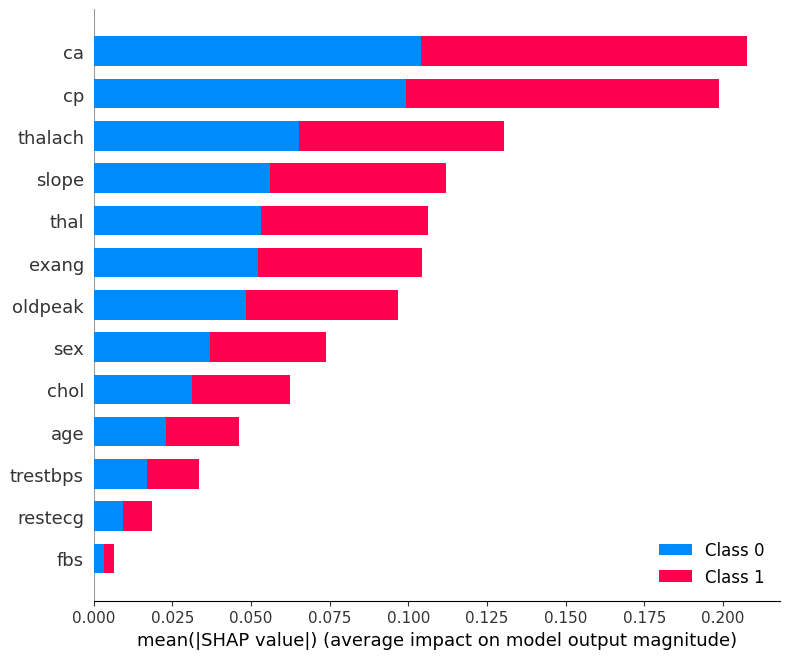

In [221]:
shap_values = explainer.shap_values(X_train_std.iloc[:100])
shap.summary_plot(shap_values, X_train_std.iloc[:100])